In [21]:
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from keras.models import load_model
from keras.callbacks import TensorBoard
import matplotlib.pyplot as plt
from time import time

In [23]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [24]:

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [25]:
# Compile model
epochs = 5
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_6 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_7 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)       

In [26]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 10.70%


In [27]:
#save model
model.save('cifar10.h5')

In [28]:

#2nd question
for i in range(0,4):
    predicted_value = model.predict(X_test[[i],:])
    predict_classes = model.predict_classes(X_test[[i],:])
    actual_value = y_test[[i],:]
    print("Actual Value for :" + str(i+1) + ' Image ' + str(numpy.argmax(actual_value)))
    print("Predicted Value for " + str(i+1) + ' Image ' + str(predict_classes[0])+'\n')

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Actual Value for :1 Image 3
Predicted Value for 1 Image 3

Actual Value for :2 Image 8
Predicted Value for 2 Image 4

Actual Value for :3 Image 8
Predicted Value for 3 Image 4

Actual Value for :4 Image 0
Predicted Value for 4 Image 4



In [29]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)


Epoch 1/5
1563/1563 [==============================] - 877s 561ms/step - loss: 1.8607 - accuracy: 0.3139 - val_loss: 1.5929 - val_accuracy: 0.4293
Epoch 2/5
1563/1563 [==============================] - 514s 329ms/step - loss: 1.5042 - accuracy: 0.4547 - val_loss: 1.4126 - val_accuracy: 0.4996
Epoch 3/5
1563/1563 [==============================] - 508s 325ms/step - loss: 1.3710 - accuracy: 0.5024 - val_loss: 1.2979 - val_accuracy: 0.5342
Epoch 4/5
1563/1563 [==============================] - 519s 332ms/step - loss: 1.2916 - accuracy: 0.5332 - val_loss: 1.2240 - val_accuracy: 0.5579
Epoch 5/5
1563/1563 [==============================] - 512s 327ms/step - loss: 1.2304 - accuracy: 0.5539 - val_loss: 1.1704 - val_accuracy: 0.5780


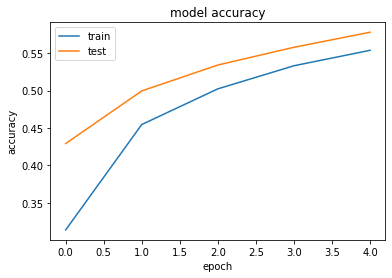

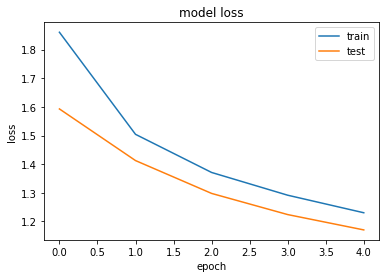

In [30]:
#question 3
#accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [31]:
#bonus question
model = load_model('cifar10.h5')


for i in range(0,4):
    predicted_value = model.predict(X_test[[i],:])
    predict_classes = model.predict_classes(X_test[[i],:])
    actual_value = y_test[[i],:]
    print("Actual Value for :" + str(i+1) + ' Image ' + str(numpy.argmax(actual_value)))
    print("Predicted Value for " + str(i+1) + ' Image ' + str(predict_classes[0])+'\n')

Actual Value for :1 Image 3
Predicted Value for 1 Image 3

Actual Value for :2 Image 8
Predicted Value for 2 Image 4

Actual Value for :3 Image 8
Predicted Value for 3 Image 4

Actual Value for :4 Image 0
Predicted Value for 4 Image 4

